# 인프런 강의 복습

## 공공데이터로 파이썬 데이터분석 시작하기 강의

## 복습으로 롯데리아와 맥도날드 위치 분석 해보기

In [1]:
# 라이브러리 로드하기
import pandas as pd # 데이터분석 라이브러리
import numpy as np #수치계산 라이브러리(평균값, 4차원배열, 로그연산 등)
import seaborn as sns # 파이썬의 시각화 라이브러리
import matplotlib.pyplot as plt

In [2]:
sns.set(font = "Malgun Gothic", rc={"axes.unicode_minus":False},style="darkgrid")

# sns.set() 이렇게 하게되면 초기화 된다.

In [3]:
# 그래프가 선명

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp/ipykernel_1552/3319868091.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [4]:
# 상가업소정보 파일 불러오기
df = pd.read_csv("data/상가업소정보_201912_01.csv",sep='|')
df.shape

(573680, 39)

In [7]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [8]:
# 데이터의 전체적인 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [9]:
# 결측치 확인하기
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [10]:
# 사용하지 않을 컬럼 제거
columns = ['상호명', '상권업종대분류명', 
           '시도명', '시군구명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(573680, 7)

In [16]:
df["시도명"].head

<bound method NDFrame.head of 0         서울특별시
1         서울특별시
2         서울특별시
3         부산광역시
4         서울특별시
          ...  
573675    서울특별시
573676    서울특별시
573677    서울특별시
573678    서울특별시
573679    서울특별시
Name: 시도명, Length: 573680, dtype: object>

In [17]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.head()

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도
0,와라와라호프,음식,서울특별시,강남구,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,서울특별시,강남구,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,서울특별시,금천구,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,서울특별시,송파구,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,서울특별시,송파구,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [44]:
# 상호명을 소문자로 만들어주기
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [45]:
df_food = df_seoul[df_seoul["상호명_소문자"].str.contains("맥도날드|mcdonald|맥도널드|롯데리아|lotteria")].copy()
df_food.shape

(331, 8)

In [46]:
df_food["상호명_소문자"].unique()

array(['롯데리아', '롯데리아롯데마트행당역점롯데마트행당역점', '롯데리아명지대학점', '롯데리아성대시장점',
       '롯데리아홈플러스강서점', '롯데리아롯데마트중계점롯데마트중계점', '맥도날드', '롯데리아강동구청d/t',
       '맥도날드구산점', '맥도날드미아점', '롯데리아인재개발센타', '롯데리아명일dt점', '맥도날드중랑점',
       '롯데리아면목중앙점', '맥도날드신천점', '롯데리아구로시장점', '롯데리아엔제리너스커피', '맥도날드신림점',
       '한국맥도널드', '맥도날드한양대점', '양평sk맥도날드', '롯데리아엔제리너스잡지회관', '롯데리아신천점',
       '롯데리아미아삼거리점', '롯데리아합정점', '롯데리아사당점', '맥도날드중계점', '롯데리아서울대입구역점',
       '맥도날드송정역점', '한국맥도날드서울시흥dt점', '맥도날드외대점', '맥도날드연세대점', '롯데리아올림픽공원점',
       '롯데리아군자점', '한국맥도날드미아dt점', '맥도날드노원한신점', '맥도날드수유점', '롯데리아혜화점',
       '롯데리아홍대점', '롯데리아나뚜두부문', '맥도날드파리공원점', '한국맥도날드등촌dt점', '롯데리아아현점',
       '롯데리아건대역점', '롯데리아길음뉴타운점', '롯데리아시흥중앙점', '롯데리아t.g.ifrida',
       '한국맥도날드가산비즈니스센터점', '롯데리아크리스피크림sk', '롯데리아t.g.i.f강', '한국맥도날드어린이대공원',
       '롯데리아angelin', '한국맥도날드합정메세나', '롯데리아보네스삐브레드종', '한국맥도날드상계dt점상계dt점',
       '한국맥도날드신도림디큐브', '롯데리아청량리역점', '롯데리아tgif강남역', '한국맥도날드강남2호',
       '한국맥도날드은평이마트', '롯데리아t.g.i.f홍', '롯데리아보네스뻬브래드', '롯데리아엔제리너스연대',
       '롯데리아t.g.i.f', '롯데리아javaco', '롯

In [47]:
df_food.head()

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도,상호명_소문자
47,롯데리아,음식,서울특별시,관악구,서울특별시 관악구 남부순환로 1610,126.929288,37.483899,롯데리아
79,롯데리아롯데마트행당역점롯데마트행당역점,음식,서울특별시,성동구,서울특별시 성동구 행당로 82,127.027513,37.556238,롯데리아롯데마트행당역점롯데마트행당역점
1859,롯데리아,음식,서울특별시,동대문구,서울특별시 동대문구 왕산로 205,127.045022,37.580196,롯데리아
2367,롯데리아명지대학점,음식,서울특별시,서대문구,서울특별시 서대문구 거북골로 31,126.924319,37.579563,롯데리아명지대학점
3475,롯데리아성대시장점,음식,서울특별시,동작구,서울특별시 동작구 상도로 102,126.931762,37.499933,롯데리아성대시장점


In [50]:
# 맥도날드, 롯데리아로 명시해주기
# ~는 해당 문자 제외 

df_food.loc[df_food["상호명_소문자"].str.contains("맥도날드|mcdonald"),"브랜드명"] = "맥도날드"
df_food.loc[~df_food["상호명_소문자"].str.contains("맥도날드|mcdonald"),"브랜드명"] = "롯데리아"
# df_food.loc[df_food["상호명_소문자"].str.contains("롯데리아|lotteria"),"브랜드명"] = "롯데리아"
df_food[["상호명_소문자" ,"브랜드명"]]

,상호명_소문자,브랜드명
47,롯데리아,롯데리아
79,롯데리아롯데마트행당역점롯데마트행당역점,롯데리아
1859,롯데리아,롯데리아
2367,롯데리아명지대학점,롯데리아
3475,롯데리아성대시장점,롯데리아
...,...,...
523111,롯데리아,롯데리아
536841,한국로날드맥도날드하우스,맥도날드
553285,롯데리아,롯데리아
553840,롯데리아서관,롯데리아


In [51]:
# 확인해보기
df_food[["상호명","브랜드명"]].tail()

,상호명,브랜드명
523111,롯데리아,롯데리아
536841,한국로날드맥도날드하우스,맥도날드
553285,롯데리아,롯데리아
553840,롯데리아서관,롯데리아
571857,맥도날드,맥도날드


In [53]:
df_food["상권업종대분류명"].head()

47      음식
79      음식
1859    음식
2367    음식
3475    음식
Name: 상권업종대분류명, dtype: object

In [54]:
df_food = df_food[df_food["상권업종대분류명"] == "음식"].copy()
df_food.shape

(327, 9)

In [55]:
# 각 매장의 갯수
df_food["브랜드명"].value_counts()

롯데리아    193
맥도날드    134
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

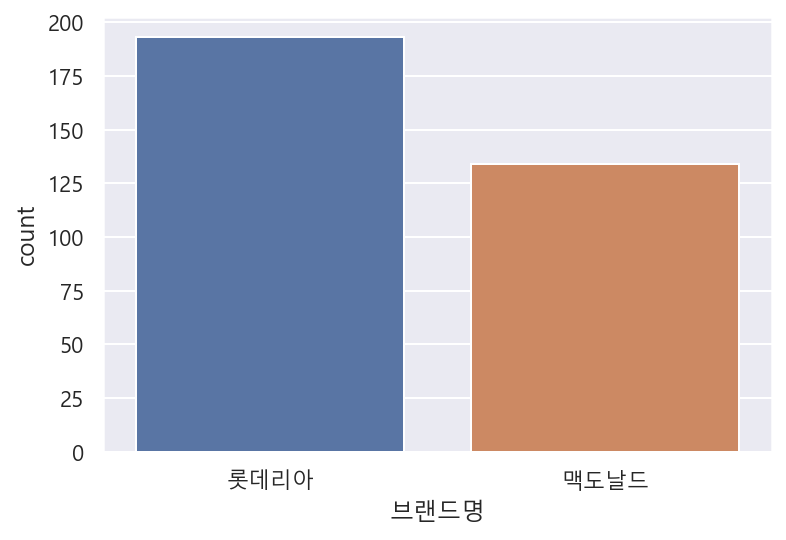

In [56]:
sns.countplot(data = df_food,x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

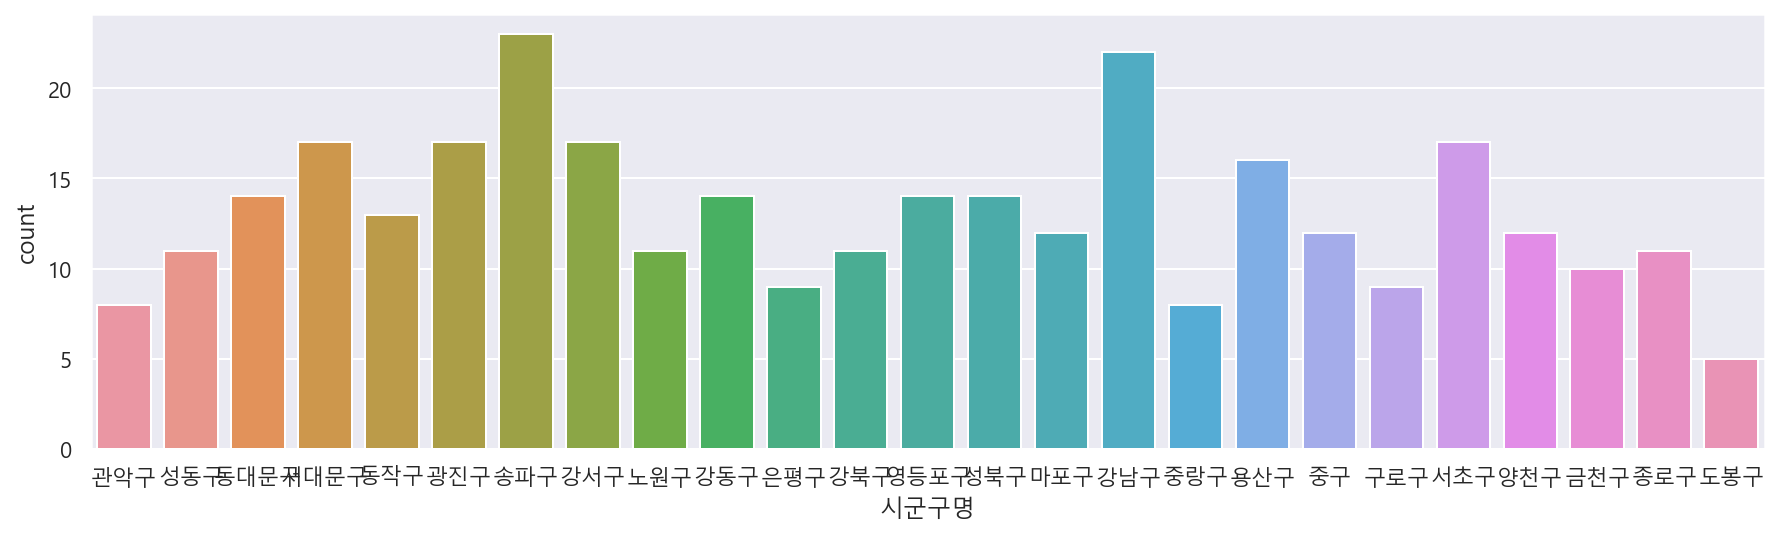

In [57]:
plt.figure(figsize=(15,4))
sns.countplot(data = df_food,x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

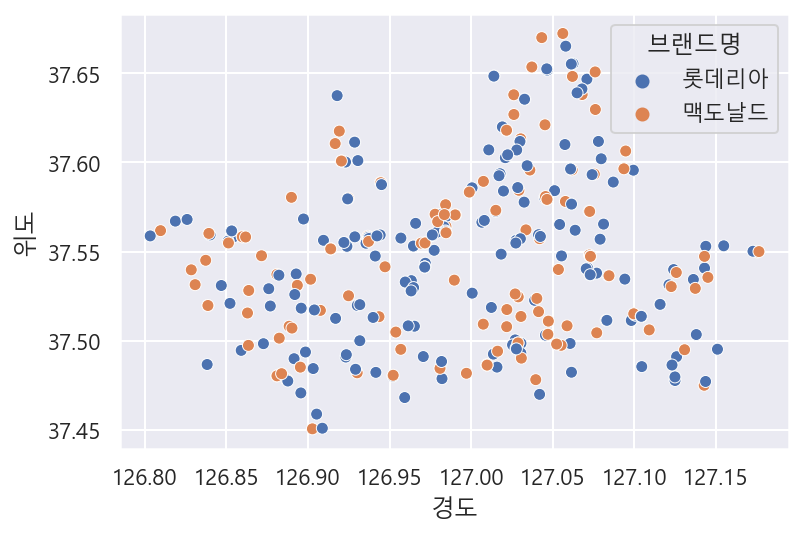

In [86]:
sns.scatterplot(data=df_food,x="경도",y="위도",hue="브랜드명")

<AxesSubplot:>

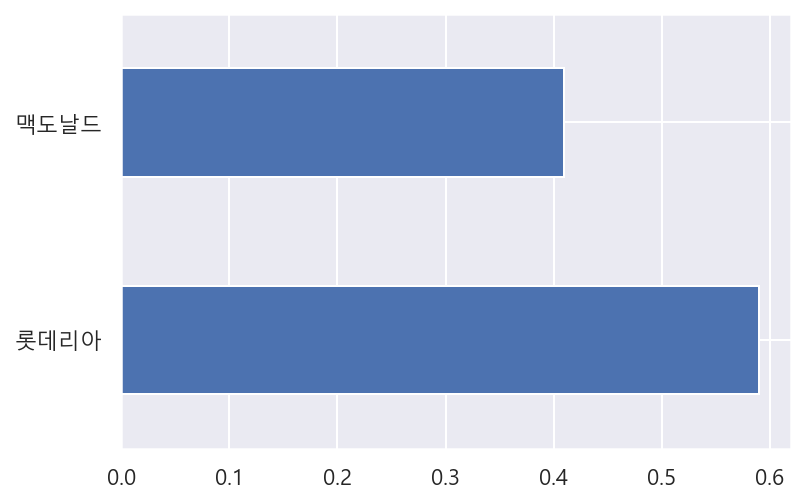

In [89]:
# normalize=True 빈도수 구하기
df_food["브랜드명"].value_counts(normalize=True).plot.barh()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='경도', ylabel='위도'>

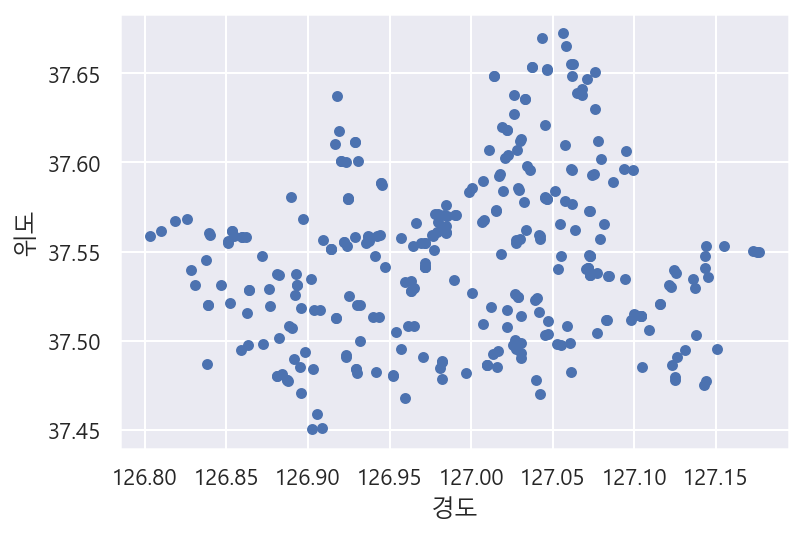

In [58]:
df_food[["위도","경도"]].plot.scatter(x="경도",y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

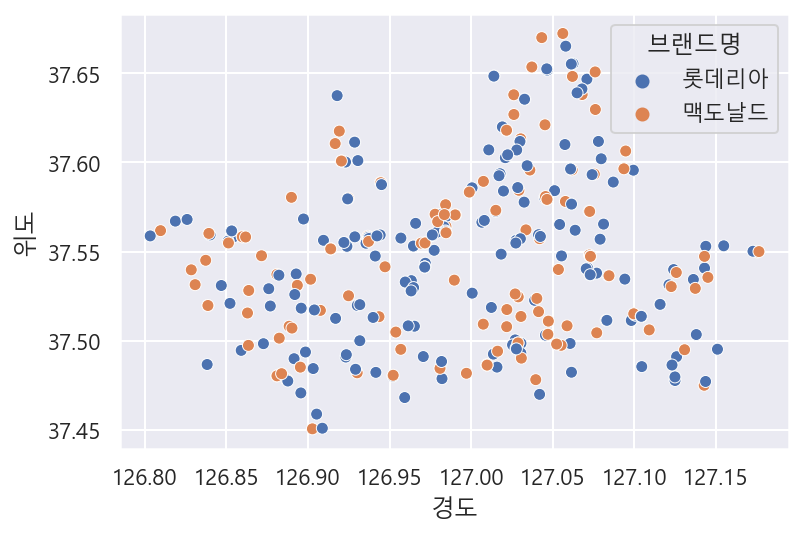

In [59]:
sns.scatterplot(data=df_food,x="경도",y="위도",hue="브랜드명")

Text(0.5, 0.98, 'kde')

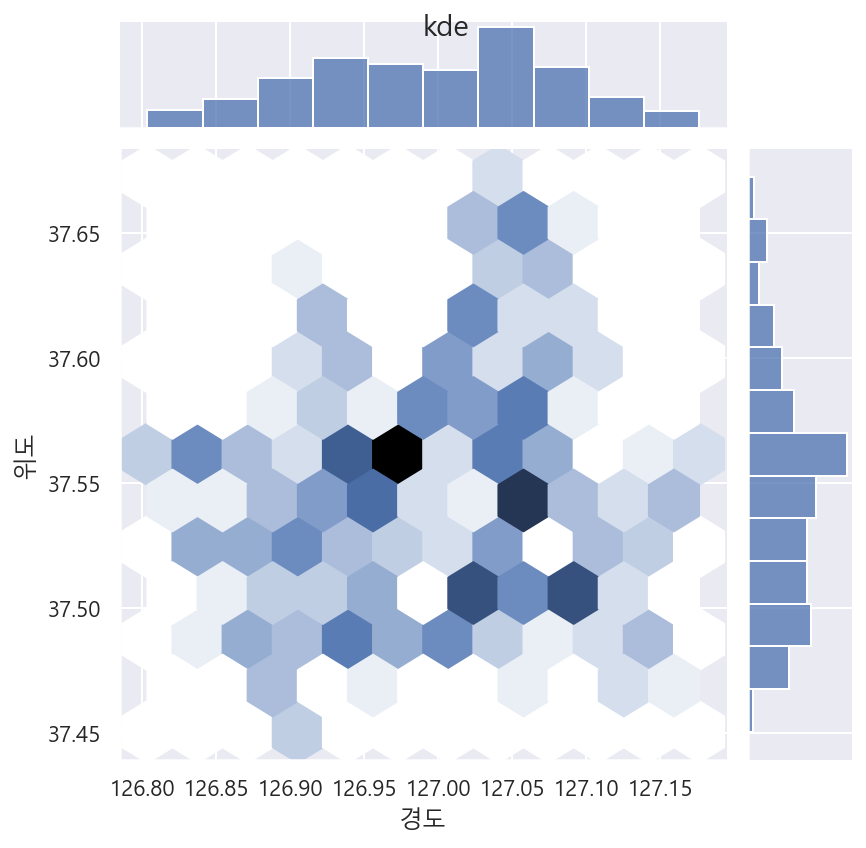

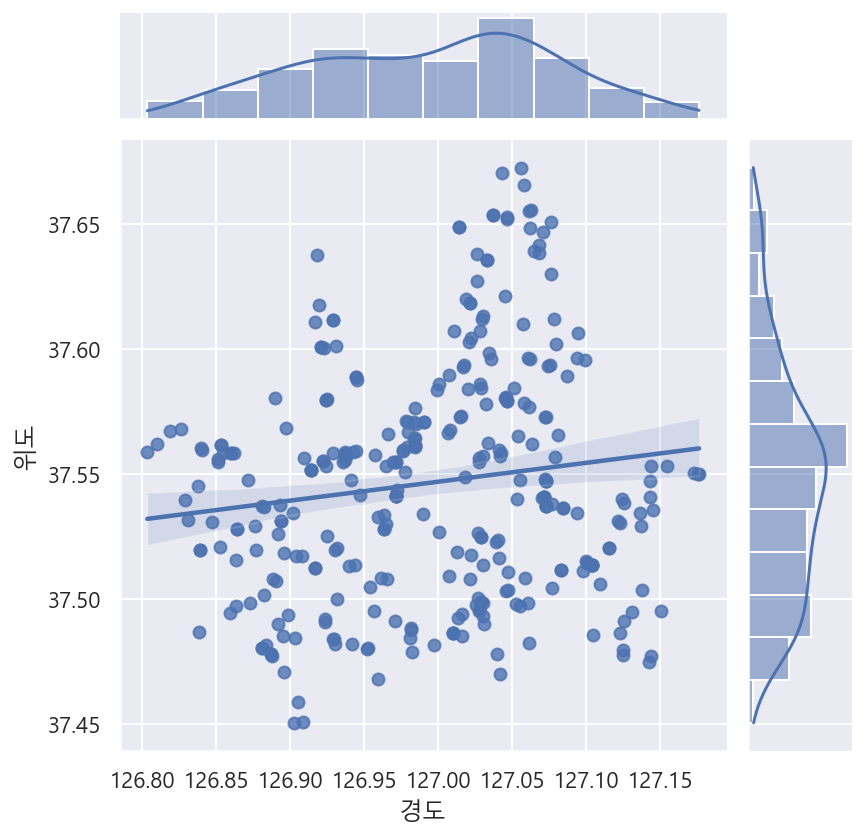

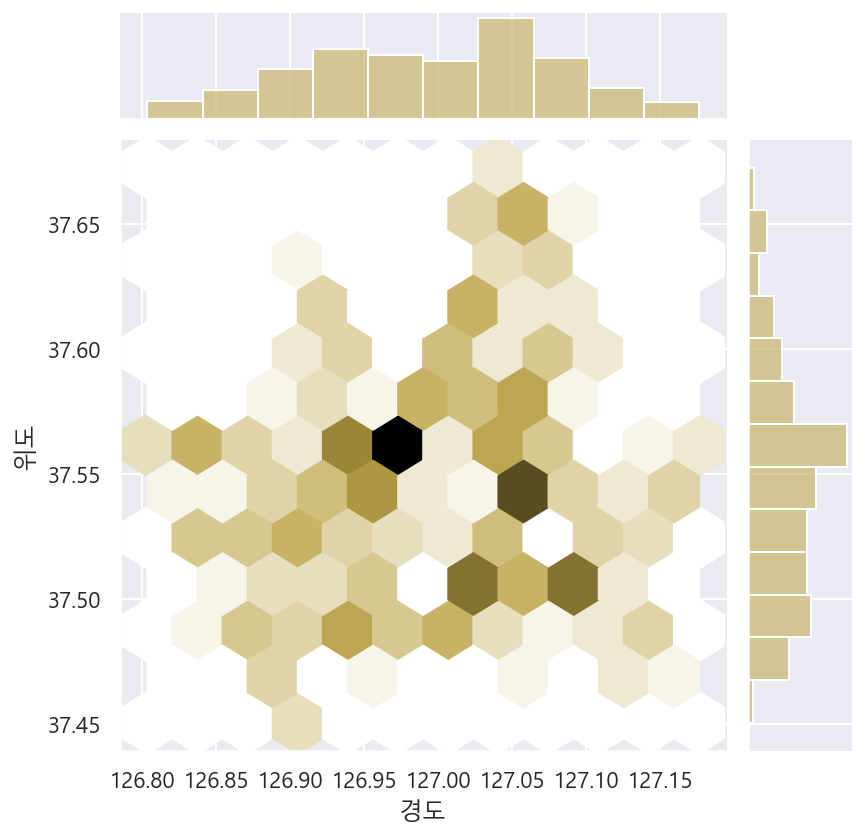

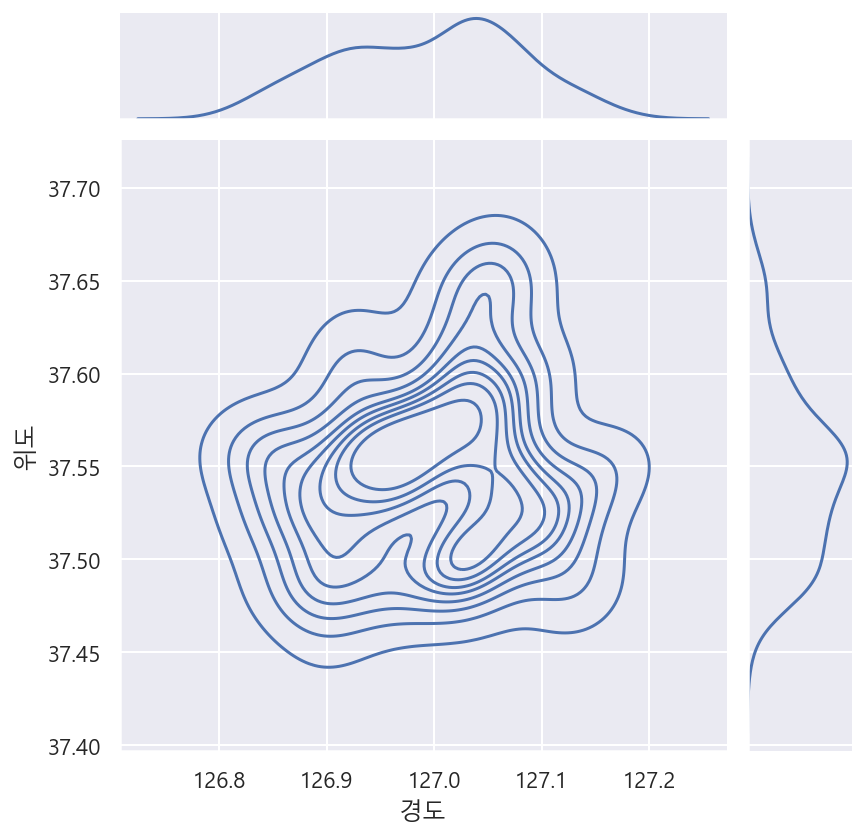

In [62]:
# jointplot
# 데이터가 분산되어 있는 정도를 한 눈에 파악하기 쉬움
# 

a = sns.jointplot(data=df_food, x="경도", y="위도", kind="hex")
b = sns.jointplot(data=df_food, x="경도", y="위도",kind='reg')
c = sns.jointplot(data=df_food, x="경도", y="위도",kind='hex', color='y')
d = sns.jointplot(data=df_food, x="경도", y="위도",kind='kde')

a.fig.suptitle('기본')
a.fig.suptitle('reg')
a.fig.suptitle('hex')
a.fig.suptitle('kde')

In [63]:
df_food_vs = df_food.groupby(["시군구명","브랜드명"])["상호명"].count()
df_food_vs.head()

시군구명  브랜드명
강남구   롯데리아     8
      맥도날드    14
강동구   롯데리아     7
      맥도날드     7
강북구   롯데리아     5
Name: 상호명, dtype: int64

In [64]:
df_food_vs.to_frame()

상호명
시군구명 브랜드명     
강남구  롯데리아    8
     맥도날드   14
강동구  롯데리아    7
     맥도날드    7
강북구  롯데리아    5
     맥도날드    6
강서구  롯데리아    9
     맥도날드    8
관악구  롯데리아    6
     맥도날드    2
광진구  롯데리아   12
     맥도날드    5
구로구  롯데리아    4
     맥도날드    5
금천구  롯데리아    4
     맥도날드    6
노원구  롯데리아    6
     맥도날드    5
도봉구  롯데리아    2
     맥도날드    3
동대문구 롯데리아    8
     맥도날드    6
동작구  롯데리아    9
     맥도날드    4
마포구  롯데리아    7
     맥도날드    5
서대문구 롯데리아   13
     맥도날드    4
서초구  롯데리아    8
     맥도날드    9
성동구  롯데리아    8
     맥도날드    3
성북구  롯데리아   11
     맥도날드    3
송파구  롯데리아   16
     맥도날드    7
양천구  롯데리아    5
     맥도날드    7
영등포구 롯데리아    9
     맥도날드    5
용산구  롯데리아   14
     맥도날드    2
은평구  롯데리아    5
     맥도날드    4
종로구  롯데리아    4
     맥도날드    7
중구   롯데리아    8
     맥도날드    4
중랑구  롯데리아    5
     맥도날드    3

In [65]:
# reset_index 로 인덱스를 컬럼으로 만들기
df_food_vs = df_food_vs.reset_index()
df_food_vs.head()

,시군구명,브랜드명,상호명
0,강남구,롯데리아,8
1,강남구,맥도날드,14
2,강동구,롯데리아,7
3,강동구,맥도날드,7
4,강북구,롯데리아,5


In [66]:
df_food_vs.columns=['구', '브랜드명', '매장수']
df_food_vs.head()

,구,브랜드명,매장수
0,강남구,롯데리아,8
1,강남구,맥도날드,14
2,강동구,롯데리아,7
3,강동구,맥도날드,7
4,강북구,롯데리아,5


In [67]:
# 피벗테이블로 만들기
pivot = pd.pivot_table(data=df_food,index=["시군구명","브랜드명"],values="상호명",aggfunc="count")
pivot

상호명
시군구명 브랜드명     
강남구  롯데리아    8
     맥도날드   14
강동구  롯데리아    7
     맥도날드    7
강북구  롯데리아    5
     맥도날드    6
강서구  롯데리아    9
     맥도날드    8
관악구  롯데리아    6
     맥도날드    2
광진구  롯데리아   12
     맥도날드    5
구로구  롯데리아    4
     맥도날드    5
금천구  롯데리아    4
     맥도날드    6
노원구  롯데리아    6
     맥도날드    5
도봉구  롯데리아    2
     맥도날드    3
동대문구 롯데리아    8
     맥도날드    6
동작구  롯데리아    9
     맥도날드    4
마포구  롯데리아    7
     맥도날드    5
서대문구 롯데리아   13
     맥도날드    4
서초구  롯데리아    8
     맥도날드    9
성동구  롯데리아    8
     맥도날드    3
성북구  롯데리아   11
     맥도날드    3
송파구  롯데리아   16
     맥도날드    7
양천구  롯데리아    5
     맥도날드    7
영등포구 롯데리아    9
     맥도날드    5
용산구  롯데리아   14
     맥도날드    2
은평구  롯데리아    5
     맥도날드    4
종로구  롯데리아    4
     맥도날드    7
중구   롯데리아    8
     맥도날드    4
중랑구  롯데리아    5
     맥도날드    3

In [69]:
# 특정구만 가져와서 보기
pivot.loc["종로구"]

,상호명
브랜드명,
롯데리아,4
맥도날드,7


<AxesSubplot:xlabel='구', ylabel='매장수'>

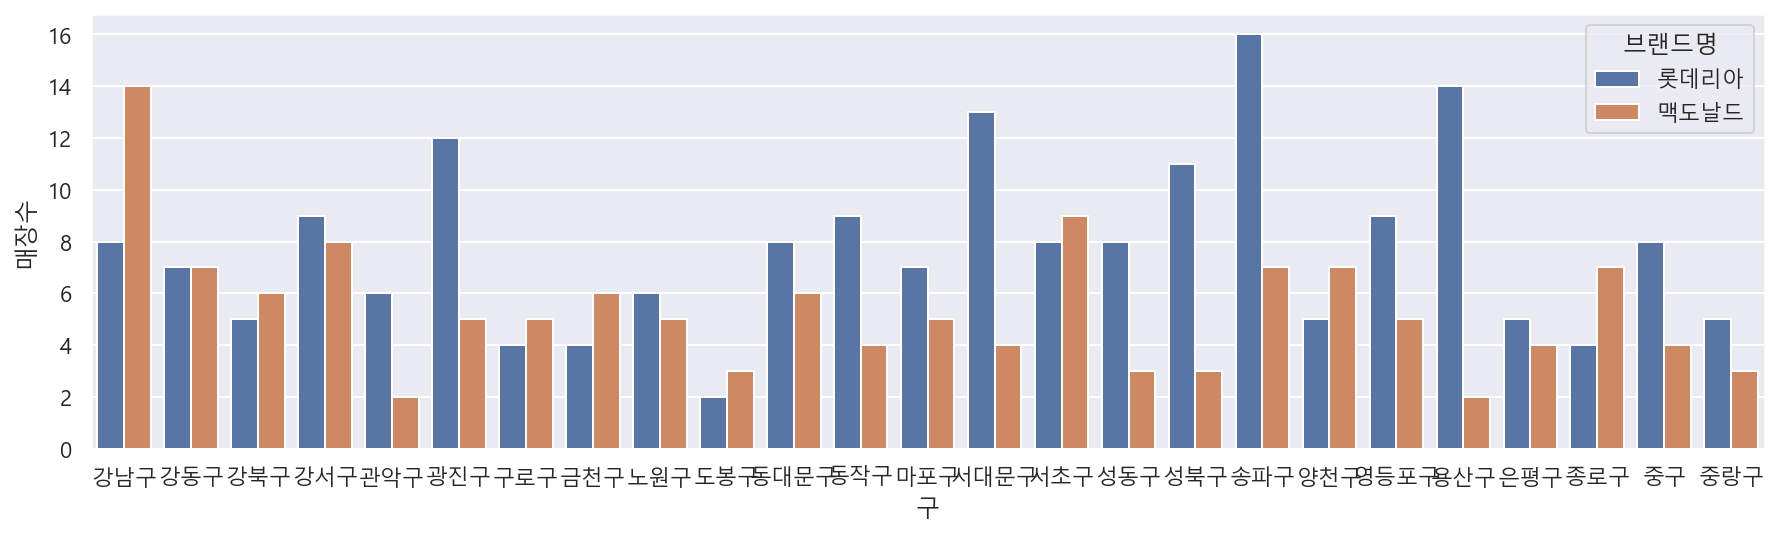

In [70]:
# 매장 시각화

plt.figure(figsize=(15,4))
sns.barplot(data=df_food_vs,x="구",y="매장수",hue="브랜드명")

<AxesSubplot:xlabel='시군구명,브랜드명'>

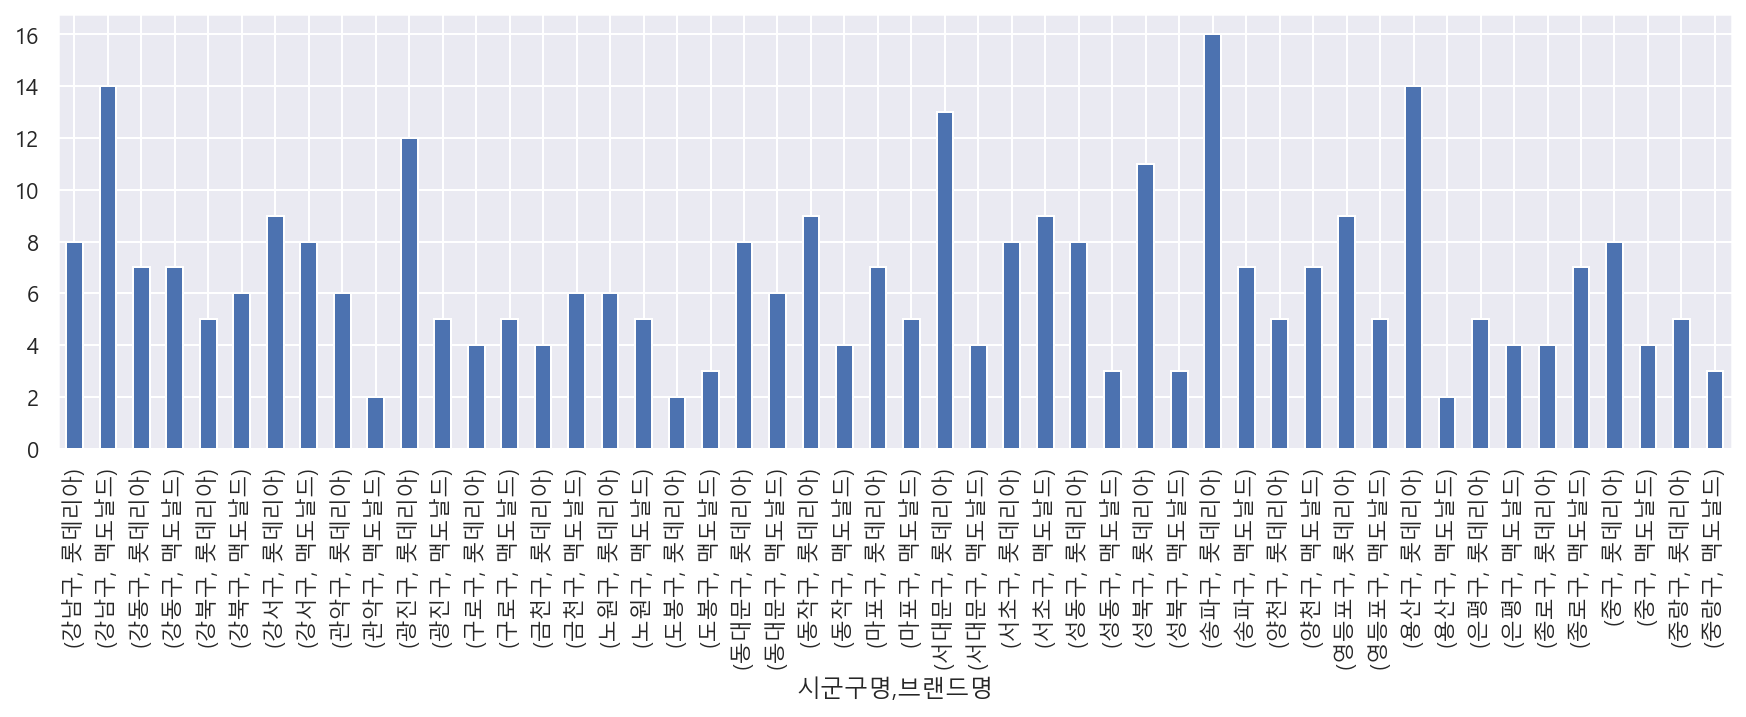

In [71]:
# 시군구명과 브랜드명으로 그룹화하여 상호명의 갯수 세기
group = df_food.groupby(["시군구명","브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명'>

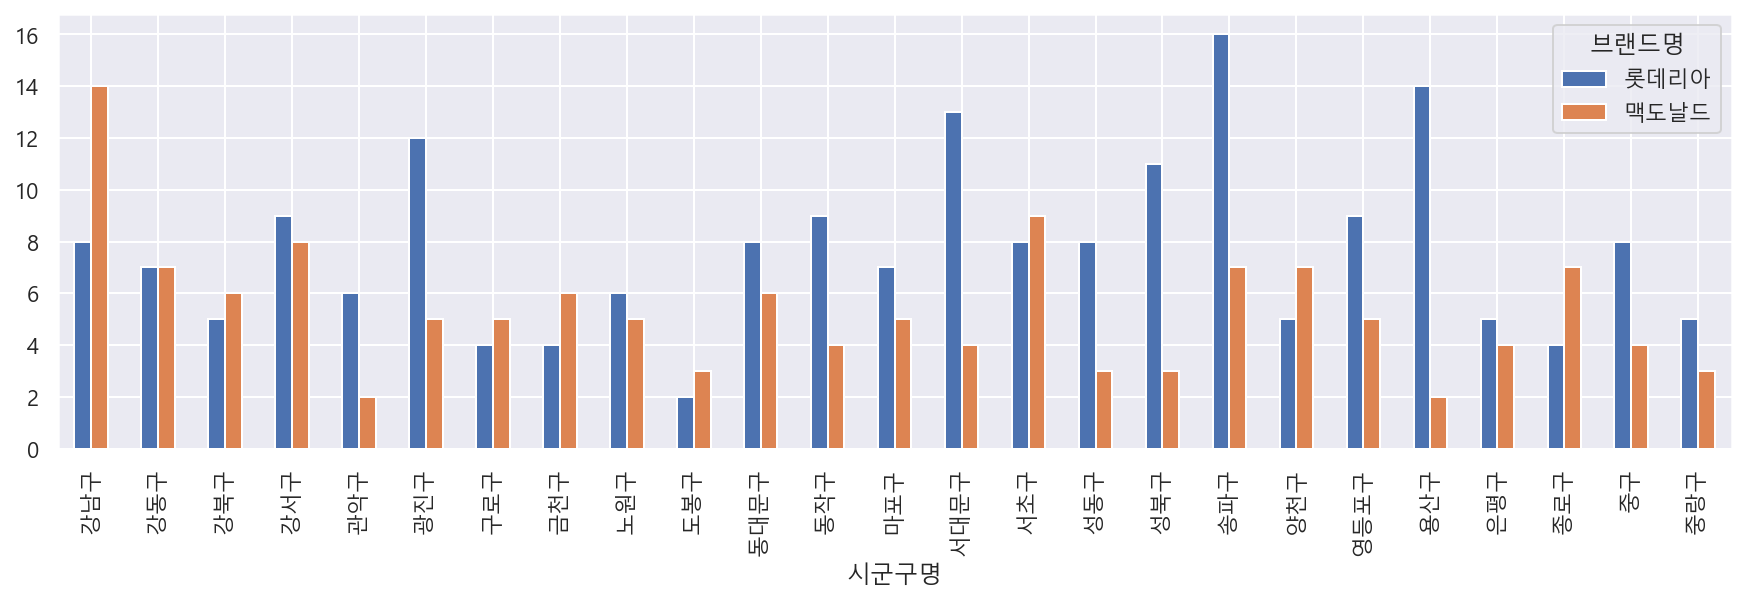

In [72]:
# unstack을 활용하면 색을 다르게 볼 수 있다.
group.unstack().plot.bar(figsize=(15,4))

In [73]:
pivot.unstack()

상호명     
브랜드명 롯데리아 맥도날드
시군구명          
강남구     8   14
강동구     7    7
강북구     5    6
강서구     9    8
관악구     6    2
광진구    12    5
구로구     4    5
금천구     4    6
노원구     6    5
도봉구     2    3
동대문구    8    6
동작구     9    4
마포구     7    5
서대문구   13    4
서초구     8    9
성동구     8    3
성북구    11    3
송파구    16    7
양천구     5    7
영등포구    9    5
용산구    14    2
은평구     5    4
종로구     4    7
중구      8    4
중랑구     5    3

<AxesSubplot:xlabel='시군구명'>

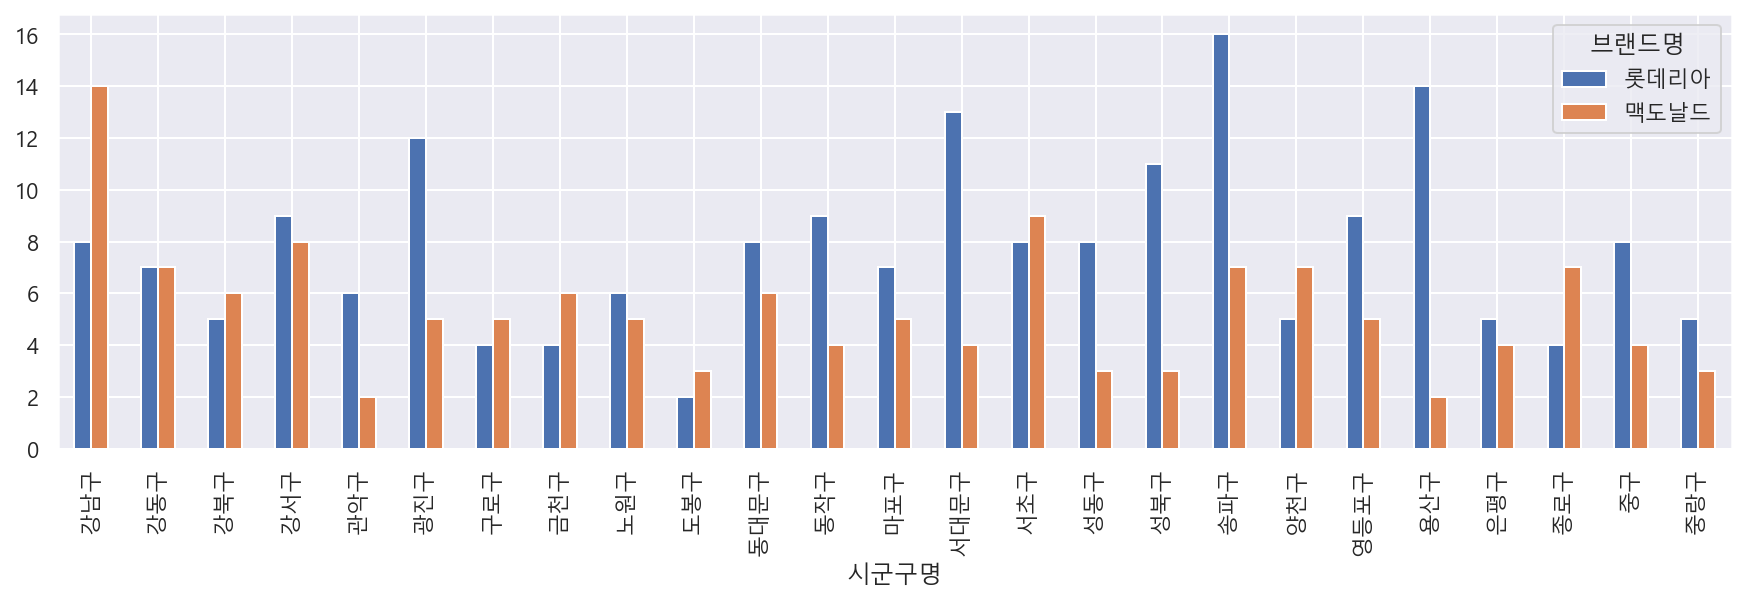

In [74]:
pd.pivot_table(data=df_food, index="시군구명", columns="브랜드명",values="상호명",aggfunc="count").plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명', ylabel='count'>

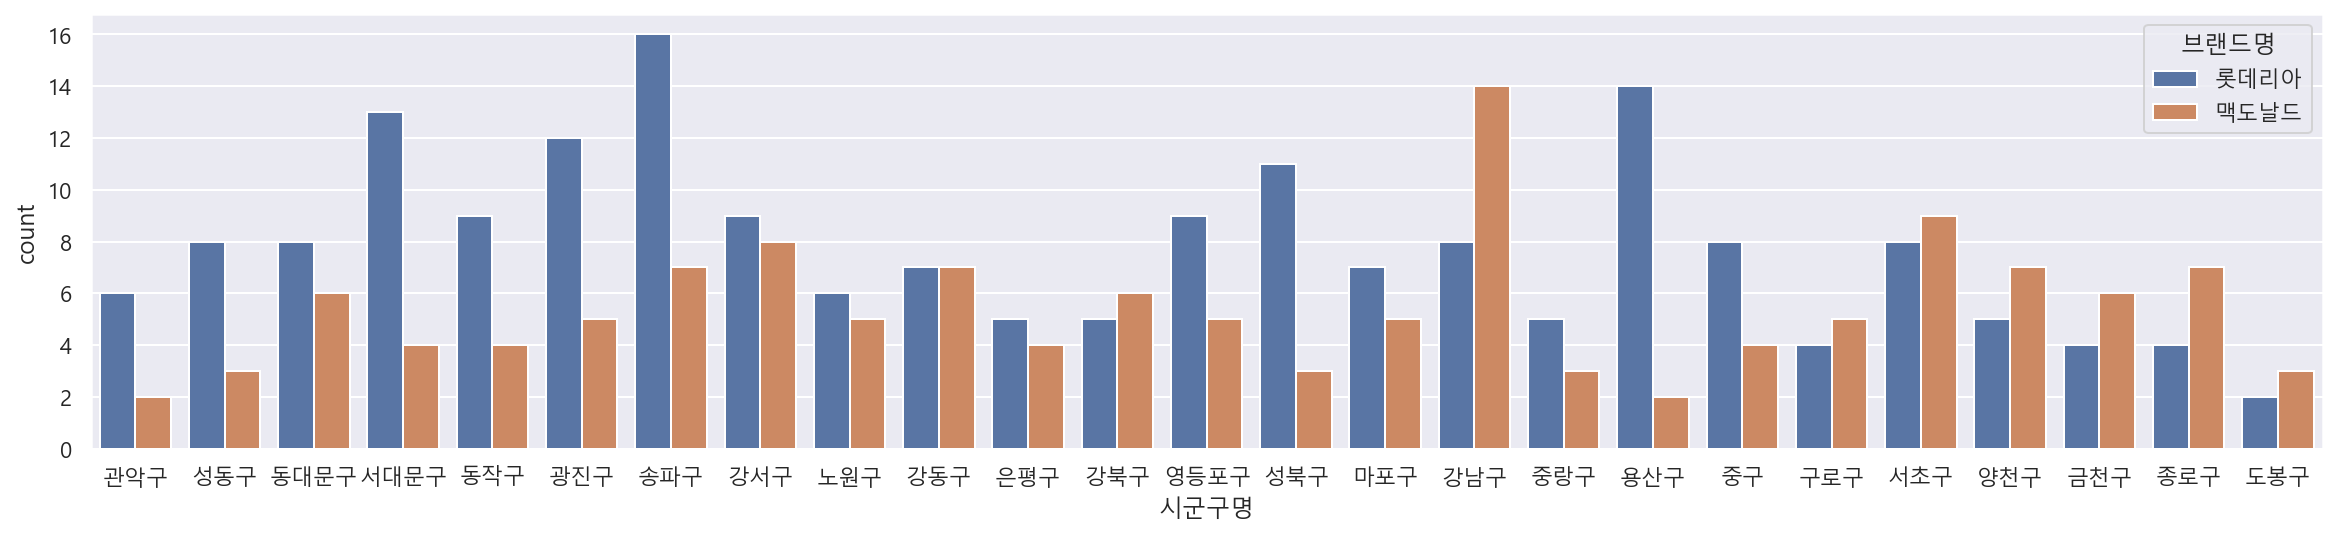

In [79]:
# countplot
plt.figure(figsize=(20,4))
sns.countplot(data=df_food,x="시군구명",hue="브랜드명")

In [80]:
# folium 사용하기
import folium 

In [82]:
# 지도의 중심
lat = df_food["위도"].mean()
long = df_food["경도"].mean()

In [85]:
m = folium.Map([lat,long],zoom_start=10,tiles="Stamen Toner")
# Stamen Toner : 지도 어둡게 표시
for i in df_food.index:
    sub_lat = df_food.loc[i,"위도"] # 위도 넣기
    sub_long = df_food.loc[i,"경도"] # 경도 넣기
    title = df_food.loc[i,"상호명"] + "-" + df_food.loc[i,"도로명주소"] # 상호명 주소와 도로명 주소 넣기
    
    color="blue" 
    if df_food.loc[i,"브랜드명"] == "롯데리아":
        color="red" # 롯데리아이면 레드
    #else df_food.loc[i,"브랜드명"] == "맥도날드":
     #   color="blue" # 맥도날드면 블루
    
    folium.CircleMarker([sub_lat,sub_long],radius=3,color=color,tootip=title).add_to(m) # CircleMarker
    
m